# Homework 2

In [1]:
!pip install requests

In [2]:
import requests
import pandas as pd
import numpy as np

### Step 1
Get the time series for the following cryptocurrencies from `cryptowat.ch` starting from 2021-11-22, hourly data
- ETH
- SOL
- AVAX
- USDT
- FLOW

In [3]:
def get_data(token):
    
    df = pd.DataFrame()
    
    try:
        res = requests.get(
            f'https://api.cryptowat.ch/markets/coinbase-pro/{token}usd/ohlc',
            params={
                'periods': '3600',
                'after': str(int(pd.Timestamp('2021-11-22').timestamp())),
                'before':str(int(pd.Timestamp('2021-12-13').timestamp()))
            }
        )
        print(f"coinbase-pro: {token}")
        df = pd.DataFrame(
            res.json()['result']['3600'],
            columns=['ts', 'open', 'high', 'low', 'close', 'volume', 'volumeUSD']
        )
        df['ts'] = pd.to_datetime(df.ts, unit='s')
        df['token'] = token
    except:
        res = requests.get(
            f'https://api.cryptowat.ch/markets/kraken/{token}usd/ohlc',
            params={
                'periods': '3600',
                'after': str(int(pd.Timestamp('2021-11-22').timestamp())),
                'before':str(int(pd.Timestamp('2021-12-13').timestamp()))
            }
        )
        print("coinbase-pro failed")
        print(f"kraken: {token}")
        df = pd.DataFrame(
            res.json()['result']['3600'],
            columns=['ts', 'open', 'high', 'low', 'close', 'volume', 'volumeUSD']
        )
        df['ts'] = pd.to_datetime(df.ts, unit='s')
        df['token'] = token
    return df

In [4]:
tokens = ['ETH', 'SOL', 'AVAX', 'USDT', 'FLOW']

In [5]:
dfs = {}
for token in tokens:
    dfs[token] = get_data(token)
    print("shape: {}".format(dfs[token].shape))

coinbase-pro: ETH
shape: (505, 8)
coinbase-pro: SOL
shape: (505, 8)
coinbase-pro: AVAX
shape: (505, 8)
coinbase-pro: USDT
shape: (505, 8)
coinbase-pro: FLOW
coinbase-pro failed
kraken: FLOW
shape: (505, 8)


### Step 2
Get the total USD volume traded for each token in a dataframe, sorted from highest volume to lowest volume

In [6]:
dic = {}
for token in tokens:
    df = dfs[token]
    dic[token] = sum(df['volumeUSD'])
volumeUSD = pd.DataFrame.from_dict(dic, orient = 'index',columns = ['volumeUSD'])
volumeUSD.sort_values(by='volumeUSD',ascending=False)

,volumeUSD
ETH,1.959032e+10
SOL,6.426008e+09
AVAX,3.255953e+09
USDT,1.873243e+09
FLOW,8.216603e+07


### Step 3

Add a column that calculates the close price ratio between ETH and SOL for each house (i.e. close price of ETH / close price of SOL for each period)

In [7]:
ratio = dfs['ETH']['close']/dfs['SOL']['close']
for token in tokens:
    dfs[token]['closeRatio'] = ratio

#check the last dataframe
dfs[token]

,ts,open,high,low,close,volume,volumeUSD,token,closeRatio
0,2021-11-22 00:00:00,13.887,14.169,13.887,14.150,23261.381369,327475.506965,FLOW,18.471694
1,2021-11-22 01:00:00,14.053,14.453,13.543,13.621,29108.788932,411767.484368,FLOW,18.736150
2,2021-11-22 02:00:00,13.534,13.862,13.387,13.753,24737.688935,338660.037818,FLOW,18.577985
3,2021-11-22 03:00:00,13.753,13.813,13.435,13.652,10224.587462,139852.146013,FLOW,18.794937
4,2021-11-22 04:00:00,13.652,13.652,13.382,13.581,5998.121286,81263.038401,FLOW,18.891059
...,...,...,...,...,...,...,...,...,...
500,2021-12-12 20:00:00,9.250,9.294,9.250,9.269,747.903424,6925.306680,FLOW,23.726814
501,2021-12-12 21:00:00,9.290,9.336,9.290,9.332,314.334810,2930.562321,FLOW,23.775238
502,2021-12-12 22:00:00,9.326,9.337,9.303,9.321,6488.259917,60447.844839,FLOW,23.773621
503,2021-12-12 23:00:00,9.307,9.316,9.171,9.213,73230.422334,675942.336486,FLOW,23.858742


### Step 4
Change the name of the `volume` and `volumeUSD` columns to `volumeBase` and `volumeTerm`

In [8]:
for token in tokens:
    dfs[token].rename(columns = {'volume':'volumeBase', 'volumeUSD':'volumeTerm'}, inplace=True)

#check the last dataframe
dfs[token]

,ts,open,high,low,close,volumeBase,volumeTerm,token,closeRatio
0,2021-11-22 00:00:00,13.887,14.169,13.887,14.150,23261.381369,327475.506965,FLOW,18.471694
1,2021-11-22 01:00:00,14.053,14.453,13.543,13.621,29108.788932,411767.484368,FLOW,18.736150
2,2021-11-22 02:00:00,13.534,13.862,13.387,13.753,24737.688935,338660.037818,FLOW,18.577985
3,2021-11-22 03:00:00,13.753,13.813,13.435,13.652,10224.587462,139852.146013,FLOW,18.794937
4,2021-11-22 04:00:00,13.652,13.652,13.382,13.581,5998.121286,81263.038401,FLOW,18.891059
...,...,...,...,...,...,...,...,...,...
500,2021-12-12 20:00:00,9.250,9.294,9.250,9.269,747.903424,6925.306680,FLOW,23.726814
501,2021-12-12 21:00:00,9.290,9.336,9.290,9.332,314.334810,2930.562321,FLOW,23.775238
502,2021-12-12 22:00:00,9.326,9.337,9.303,9.321,6488.259917,60447.844839,FLOW,23.773621
503,2021-12-12 23:00:00,9.307,9.316,9.171,9.213,73230.422334,675942.336486,FLOW,23.858742


### Step 5
create a fat table indexed by the timestamp, and each column is the close price of each token (i.e. this should be a table of  200 rows and 5 columns)

In [9]:
close_prices_df = pd.DataFrame()
for token in tokens:
    temp_df = dfs[token]['close'].to_frame(name = token)
    temp_df.index = dfs[token]['ts']
    close_prices_df = pd.concat([close_prices_df,temp_df],axis=1)
close_prices_df

,ETH,SOL,AVAX,USDT,FLOW
ts,,,,,
2021-11-22 00:00:00,4262.99,230.785,128.67,1.0012,14.150
2021-11-22 01:00:00,4234.37,226.000,134.85,1.0013,13.621
2021-11-22 02:00:00,4217.89,227.037,132.54,1.0012,13.753
2021-11-22 03:00:00,4193.47,223.117,133.38,1.0011,13.652
2021-11-22 04:00:00,4168.35,220.652,136.29,1.0009,13.581
...,...,...,...,...,...
2021-12-12 20:00:00,4141.99,174.570,87.41,1.0005,9.269
2021-12-12 21:00:00,4149.73,174.540,88.30,1.0006,9.332
2021-12-12 22:00:00,4124.01,173.470,87.57,1.0006,9.321


### Step 6

calculate the hour by hour log return of the close price of each token (return is calculated by np.log(price_t / price_{t-1}))

In [10]:
return_df = np.log(close_prices_df) - np.log(close_prices_df.shift(1))
return_df

,ETH,SOL,AVAX,USDT,FLOW
ts,,,,,
2021-11-22 00:00:00,NaN,NaN,NaN,NaN,NaN
2021-11-22 01:00:00,-0.006736,-0.020952,0.046912,0.0001,-0.038102
2021-11-22 02:00:00,-0.003900,0.004578,-0.017279,-0.0001,0.009644
2021-11-22 03:00:00,-0.005806,-0.017417,0.006318,-0.0001,-0.007371
2021-11-22 04:00:00,-0.006008,-0.011109,0.021583,-0.0002,-0.005214
...,...,...,...,...,...
2021-12-12 20:00:00,-0.002375,-0.004857,-0.007409,-0.0001,0.004758
2021-12-12 21:00:00,0.001867,-0.000172,0.010130,0.0001,0.006774
2021-12-12 22:00:00,-0.006217,-0.006149,-0.008302,0.0000,-0.001179


### Step 7

\[Stretch\] calculate the correlation of the tokens using the table above

In [11]:
# drop first row with NaN value
return_df = return_df[:][1:]
corr = pd.DataFrame(np.corrcoef(return_df.T), columns=tokens, index=tokens)
corr

,ETH,SOL,AVAX,USDT,FLOW
ETH,1.000000,0.733983,0.639537,-0.122907,0.557948
SOL,0.733983,1.000000,0.620348,0.110666,0.437371
AVAX,0.639537,0.620348,1.000000,-0.019130,0.383013
USDT,-0.122907,0.110666,-0.019130,1.000000,-0.198623
FLOW,0.557948,0.437371,0.383013,-0.198623,1.000000


### Step 8

\[Stretch\] visualize the correlation in a matplpotlib plot

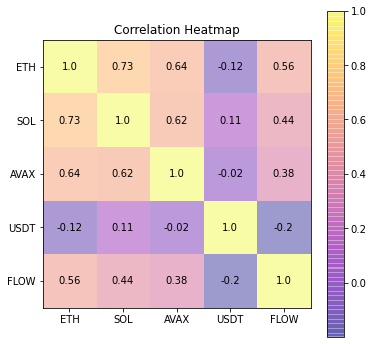

In [12]:
#heatmap

import matplotlib.pyplot as plt
from matplotlib import cm

plt.rcParams['figure.figsize'] = [6, 6]
plt.imshow(corr.to_numpy(), cmap='plasma',alpha=0.4)
plt.colorbar()
plt.title("Correlation Heatmap")
plt.xticks([i for i in range(len(tokens))],tokens)
plt.yticks([i for i in range(len(tokens))], tokens)
ax = plt.gca()
for i in range(len(tokens)):
    for j in range(len(tokens)):
        ax.text(i,j,round(corr.iloc[i][j],2),ha="center", va="center")
plt.show()

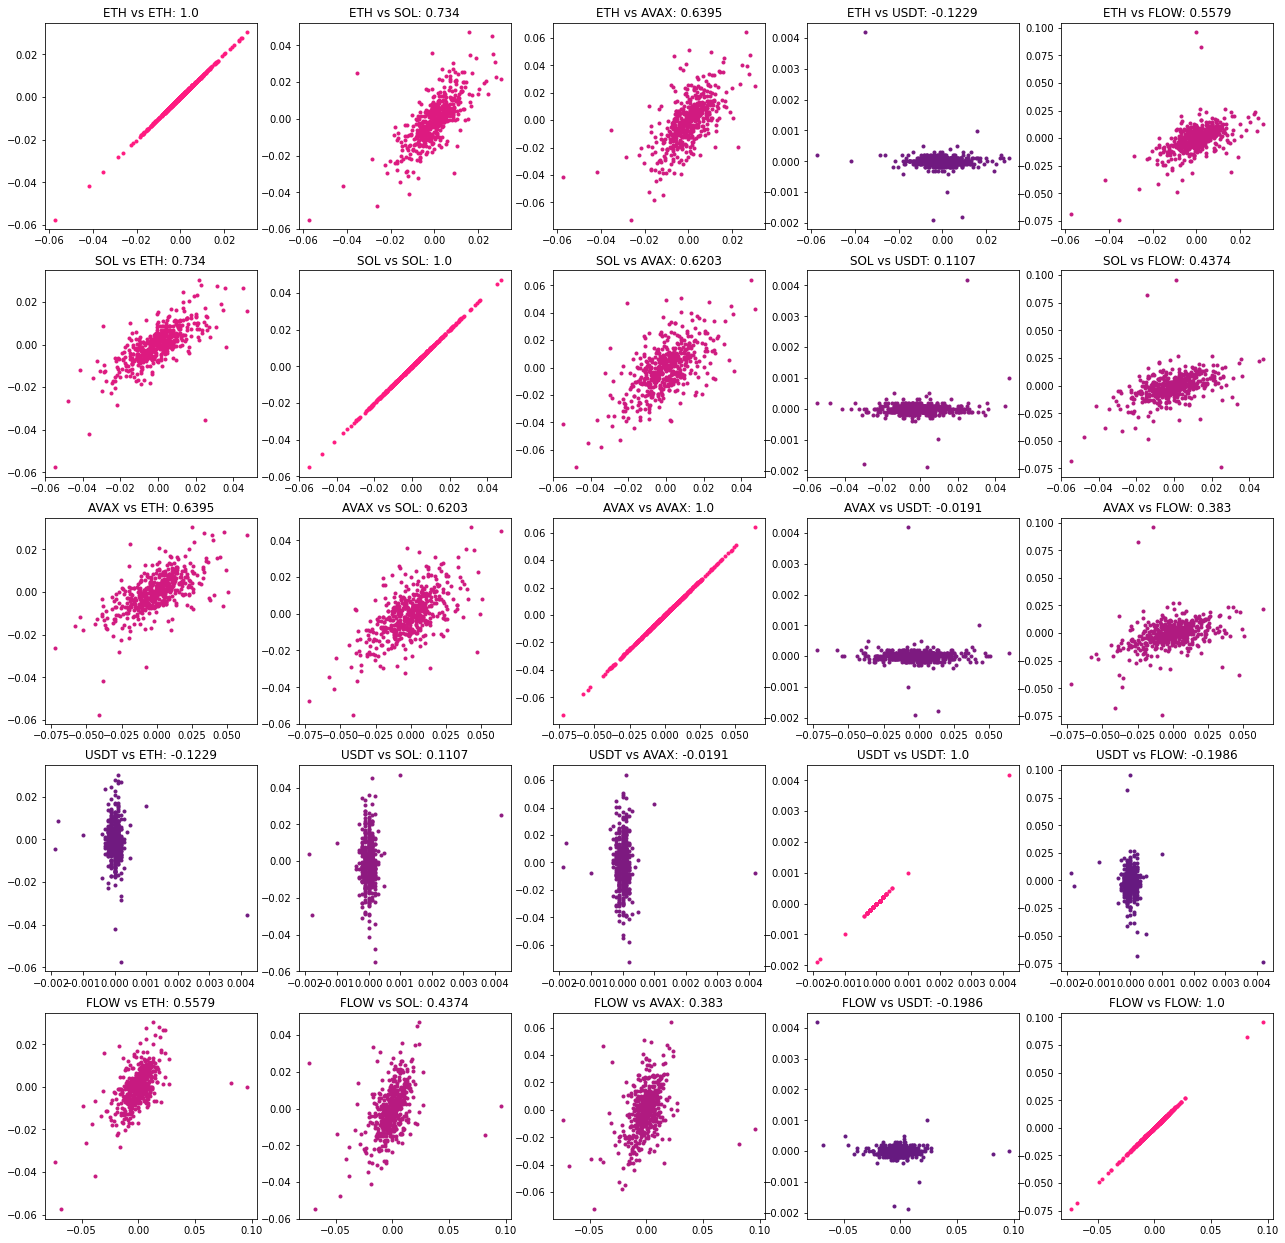

In [13]:
#display details

plt.rcParams['figure.figsize'] = [22, 22]
figure, axis = plt.subplots(5, 5)

for i,t1 in enumerate(tokens):
    for j,t2 in enumerate(tokens):
        #specify color based on correlation
        rgb = ((1+corr.iloc[i,j])/2, 0.1, 0.5)
        axis[i,j].plot(return_df[t1], return_df[t2], '.', c=rgb)
        axis[i,j].set_title(f'{t1} vs {t2}: {round(corr.iloc[i,j],4)}')

plt.show()

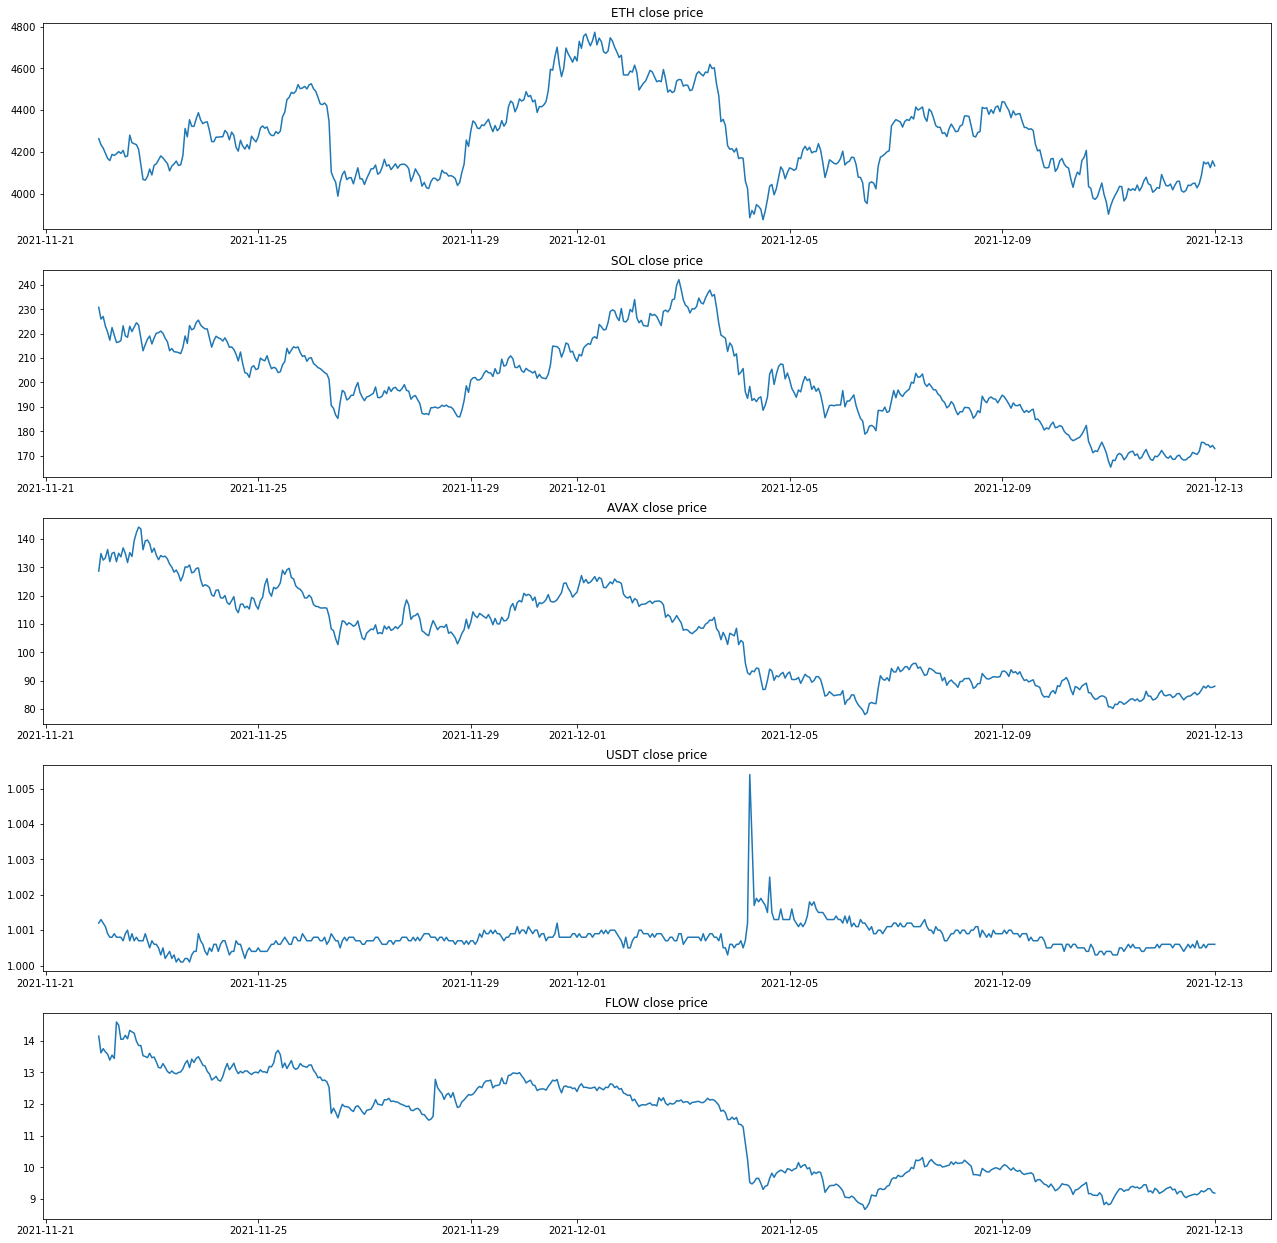

In [14]:
# plot the close price for each token

figure, axis = plt.subplots(5,1)

for i,t1 in enumerate(tokens):
    axis[i].set_title(f'{t1} close price')
    axis[i].plot(close_prices_df[t1])